Experiment A: Clustering in the Genetic Space

In [28]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import SpectralClustering, KMeans
import warnings
warnings.filterwarnings("ignore")
from genetic_utils import identify_spec, generate_pca_plot, generate_proportion_plot

In [29]:
def identify_spec(label):
    q_index = label.find('Q')
    if q_index == -1 or q_index == len(label) - 1:
        return '/'
    # if label[q_index: q_index + 2] == 'QR' or label[q_index: q_index + 2] == 'QS':
    #     return 'QR/S'
    return label[q_index: q_index + 2]

df = pd.read_csv('data/gene.csv')
meta_df = pd.read_csv('data/metadata.csv')
meta_df = meta_df[['DNA_ID','TreeNo']]
meta_df['spec'] = meta_df['TreeNo'].apply(identify_spec)
df= df.merge(meta_df, on='DNA_ID')
df.to_csv('data/gene_spec.csv', index=False)

In [30]:
n_clusters = 3

# remove where spec is QB
df = df[df['spec'] != 'QB']

data = df.drop(['DNA_ID', 'spec', 'TreeNo'], axis=1)

# # Standardize the data (important for PCA)
scaler = StandardScaler()
data = scaler.fit_transform(data)

# perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

In [32]:
species_labels = df['spec'].to_numpy()

max_score = 0
max_indecies = []


for i in range(5000):

    n_features = np.random.randint(1, 7)
    selected_features = np.random.choice(data.shape[1], n_features, replace=False)
    data_reduced = data[:, selected_features]

    cluster_labels = kmeans.fit_predict(data_reduced)
    kmeans_score = adjusted_rand_score(species_labels, cluster_labels)

    if kmeans_score > max_score:
        max_score = kmeans_score
        max_indecies = selected_features
    
    print(f'KMeans score: {kmeans_score}')

print(f'Max score: {max_score}')
print(f'Max indecies: {max_indecies}')

KMeans score: 0.15637701917681673
KMeans score: 0.4920045139547262
KMeans score: 0.5632031170828168
KMeans score: 0.4920045139547262
KMeans score: 0.48221653251417956
KMeans score: 0.40792348720700455
KMeans score: 0.4787842740019688
KMeans score: 0.40188102475573256
KMeans score: 0.49107269216268734
KMeans score: 0.4920045139547262
KMeans score: 0.1795164292259757
KMeans score: 0.4920045139547262
KMeans score: 0.22986065465522484
KMeans score: 0.33103086794030034
KMeans score: 0.4920045139547262
KMeans score: 0.22986065465522484
KMeans score: 0.28954862906752227
KMeans score: 0.4920045139547262
KMeans score: 0.06303435556717212
KMeans score: 0.14374668390665496
KMeans score: 0.33103086794030034
KMeans score: 0.14374668390665496
KMeans score: 0.1849776510916665
KMeans score: 0.4068269692630759
KMeans score: 0.48221653251417956
KMeans score: 0.26429888416958663
KMeans score: 0.4920045139547262
KMeans score: 0.31021427053837486
KMeans score: 0.54725538906185
KMeans score: 0.1822815905409

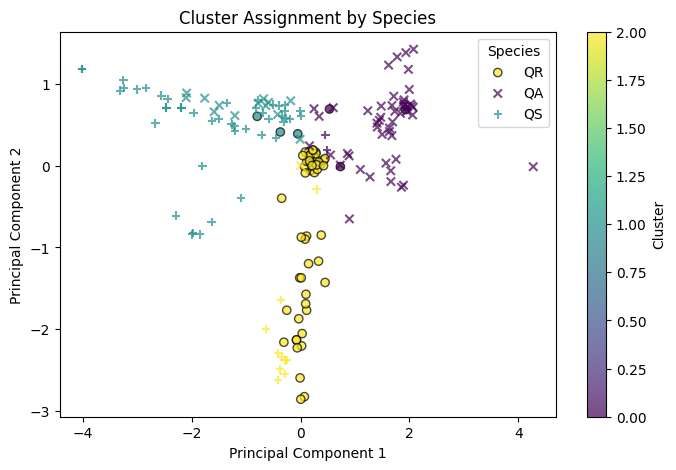

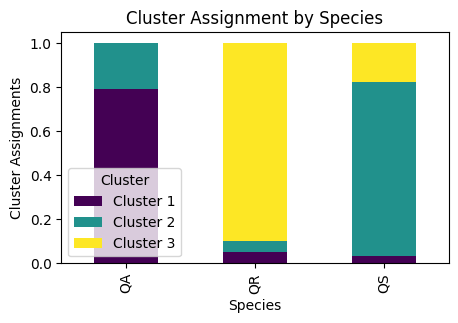

Adjusted Rand Index: 0.5632031170828168
Normalized Mutual Information: 0.5395819928381732


In [33]:
data_reduced = data[:, [1,2,0]]
cluster_labels = kmeans.fit_predict(data_reduced)

species_labels = df['spec']

# Map species to markers
unique_species = species_labels.unique()

generate_pca_plot(data, species_labels, cluster_labels, unique_species, n_clusters)
generate_proportion_plot(species_labels, cluster_labels)

In [5]:
n_clusters = 4

# data = abs(data)

# # Apply the log transformation
# transformer = FunctionTransformer(np.log10, validate=True)
# data = transformer.transform(data)

# Standardize the data (important for PCA)
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Perform spectral clustering
# spectral = SpectralClustering(n_clusters=n_clusters, random_state=0)
# cluster_labels = spectral.fit_predict(data)

data_reduced = data[:, [0, 1, 2, 5]]

# perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_reduced)


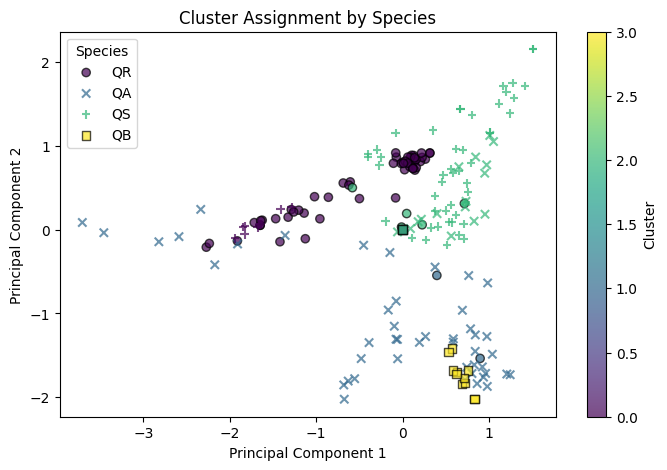

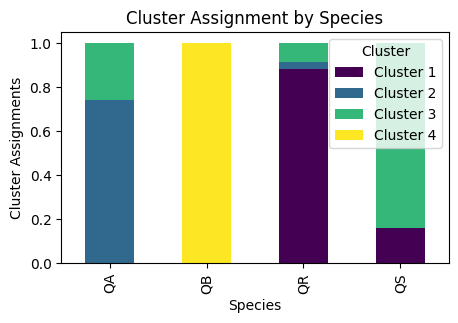

Adjusted Rand Index: 0.5739522428154988
Normalized Mutual Information: 0.6339114215602939


In [6]:
# Create a DataFrame for plotting
species_labels = df['spec']

# Map species to markers
unique_species = species_labels.unique()

generate_pca_plot(data, species_labels, cluster_labels, unique_species, n_clusters)
generate_proportion_plot(species_labels, cluster_labels)

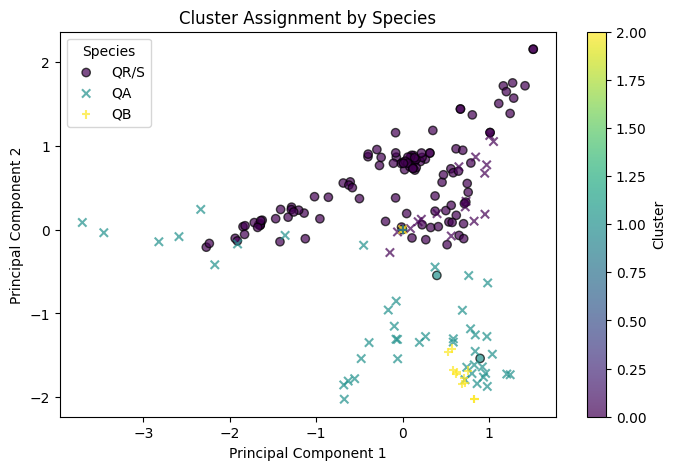

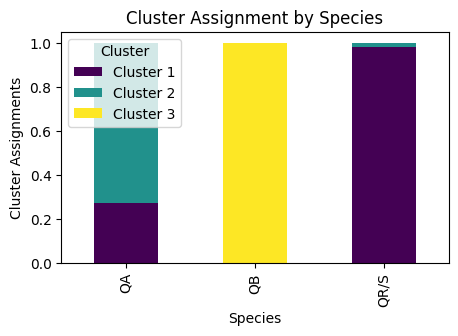

Adjusted Rand Index: 0.6622034547022886
Normalized Mutual Information: 0.6512974600599103


In [7]:
def identify_spec_new(label):
    q_index = label.find('Q')
    if q_index == -1 or q_index == len(label) - 1:
        return '/'
    if label[q_index: q_index + 2] == 'QR' or label[q_index: q_index + 2] == 'QS':
        return 'QR/S'
    return label[q_index: q_index + 2]

df = pd.read_csv('data/gene.csv')
meta_df = pd.read_csv('data/metadata.csv')
meta_df = meta_df[['DNA_ID','TreeNo']]
meta_df['spec'] = meta_df['TreeNo'].apply(identify_spec_new)
df= df.merge(meta_df.drop('TreeNo', axis=1), on='DNA_ID')

n_clusters = 3

data = df.drop(['DNA_ID', 'spec'], axis=1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
data = scaler.fit_transform(data)

data_reduced = data[:, [1, 2]]

# perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_reduced)

# Create a DataFrame for plotting
species_labels = df['spec']

# Map species to markers
unique_species = species_labels.unique()

generate_pca_plot(data, species_labels, cluster_labels, unique_species, n_clusters)
generate_proportion_plot(species_labels, cluster_labels)
